In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
%matplotlib inline

In [2]:
sns.set_style(style="darkgrid")

plt.rcParams['figure.figsize'] = [12.0, 8.0] # make plots size, double of the notebook normal

plt.rcParams['figure.figsize'] = [9.0, 6.0] #make plots size, double of the notebook normal

from IPython.display import display, HTML  # to use display() to always have well fromatted html table output

In [4]:
os.getcwd()

'c:\\Users\\okori\\Documents\\Workspace\\titanic_data_analysis'

In [7]:
path = "C:/Users/okori/Documents/Workspace/Projects"


In [8]:
os.chdir(path)

In [9]:
os.getcwd()

'C:\\Users\\okori\\Documents\\Workspace\\Projects'

['OneCampus_Academy_Project.ipynb', 'wrangle_act_Data_wrangling Project.ipynb']

In [7]:
dF = pd.read_csv("C:/Users/okori/Desktop/GlobalAcademy.onecampus/datasets/titanic_data.csv")

### Data Assessement (Inspection)

In [ ]:
# Inspect the shape of your data
# Inspect the properties of the data
# Check for missing values
# Check for duplicates
# Check for mis-labels(abnormal labels/entries in your data)
# check for differring scales in the data
# check for variance in standard deviation
# check for normal distribution
# check for outliers
# check for skewness
# Hug your data

In [20]:
# What to look out for during data inspection

#1. Is there a mixture of numeric and non-nunmeric data in the features? Yes
# Thats a problem because in data science we need our features to be represented in numerics

# 2. Are there cells with missing data in them (nan, NAN). # this suggests that there are missing data in the dataset.
# 3. There are fifteen features in the data. # Its not always feasible to count all the features visually because pandas tends to truncate columns display if the number of columns are too many.

### Inspecting the shape of the data

In [21]:
dF.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
dF.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [23]:
dF.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.000,B51 B53 B55,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.550,NaN,S
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.350,NaN,S
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.475,C83,S
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.150,NaN,Q


In [24]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
dF.shape

(891, 12)

### Assessing for missing values

In [119]:
dF.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Inspecting the data for duplicates

In [32]:
# Checking for duplicates row wise
duplicaterows = dF[dF.duplicated()]
duplicaterows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [33]:
duplicatePassengerAndTicketNo = dF[dF.duplicated(['PassengerId','Ticket'])]
duplicatePassengerAndTicketNo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [52]:
duplicatedNames = dF[dF.duplicated(['Name'])]
duplicatedNames

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [61]:
duplicatedPassengerIDs = dF.duplicated(['PassengerId']).sum()
duplicatedPassengerIDs

0

In [79]:
duplicatedTicketNo = dF.duplicated(['Ticket']).value_counts()
duplicatedTicketNo

# Though 210 datapoints exists in the ticket variable which are without entries, they will not be dropped from the sample collection since duplicates do not exist row wise

False    681
True     210
dtype: int64

In [66]:
duplicatedNames = dF.duplicated(['Name']).sum()
duplicatedNames


0

In [ ]:
# Check for mis-labels(abnormal labels/entries in your data)
# check for differring scales in the data
# check for variance in standard deviation
# check for normal distribution
# check for outliers
# check for skewness
# Hug your data

### Check for mis-labels (abnormal labels/entries in the data)

In [67]:
dF.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [68]:
uniquePclass = dF.Pclass.unique()
uniquePclass

array([3, 1, 2], dtype=int64)

In [73]:
uniqueName = dF.Name.unique().tolist()
len(uniqueName)

891

In [74]:
uniqueAge = dF.Age.unique()
uniqueAge

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [75]:
uniqueEmbarked = dF.Embarked.unique()
uniqueEmbarked

array(['S', 'C', 'Q', nan], dtype=object)

In [77]:
uniqueSurvived = dF.Survived.unique()
uniqueSurvived

array([0, 1], dtype=int64)

#### Checking for validity of values

In [83]:
Age = dF.query('Age < 1').values
Age

array([[79, 1, 2, 'Caldwell, Master. Alden Gates', 'male', 0.83, 0, 2,
        '248738', 29.0, nan, 'S'],
       [306, 1, 1, 'Allison, Master. Hudson Trevor', 'male', 0.92, 1, 2,
        '113781', 151.55, 'C22 C26', 'S'],
       [470, 1, 3, 'Baclini, Miss. Helene Barbara', 'female', 0.75, 2, 1,
        '2666', 19.2583, nan, 'C'],
       [645, 1, 3, 'Baclini, Miss. Eugenie', 'female', 0.75, 2, 1,
        '2666', 19.2583, nan, 'C'],
       [756, 1, 2, 'Hamalainen, Master. Viljo', 'male', 0.67, 1, 1,
        '250649', 14.5, nan, 'S'],
       [804, 1, 3, 'Thomas, Master. Assad Alexander', 'male', 0.42, 0, 1,
        '2625', 8.5167, nan, 'C'],
       [832, 1, 2, 'Richards, Master. George Sibley', 'male', 0.83, 1, 1,
        '29106', 18.75, nan, 'S']], dtype=object)

#### Inspecting the distribution of the observations from the titanic problem domain for Gaussian Properties, Scale variance and Standard Error

In [97]:
dF.describe().T
#For a normally distributed data, the mean, the median(central value or midpoint) and the 50% value all lies at thesame point. By inspecting the data using .describe() method, the following issues where discovered

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### Inspecting the data for Scale Variance and Standard Errors

In [ ]:
# For minimum value scale variance
Survived and Pclass range is 2
Survived and Age raneg is 20
Survived and Fare range is 8
Survived and SibSp range is 0
Survived and Parch range is 0
Age and Pclass range is 0.58
Age and Survived range is 0.42
Age and the rest of the attributes are 0.42

#For maximum value scale variance
Survived and Pclass range is 2
Survived and Age range is 79
Survived and SibSp range is 7
Survived and Parch range is 5
Survived and Fare range is 511.33
Age and Survived range is 79
Age and Pclass range is 77
Age and SipSp range is 72
Age and Parch range is 74
Age and 432.33
From the summary statistics about the data, there are differing scales between Minimum and Maximum values of variables in the dataset

##### Using Univariate Density Plots to inspect the Gaussian Properties (Normal Distribution) and Skeweness of the variables

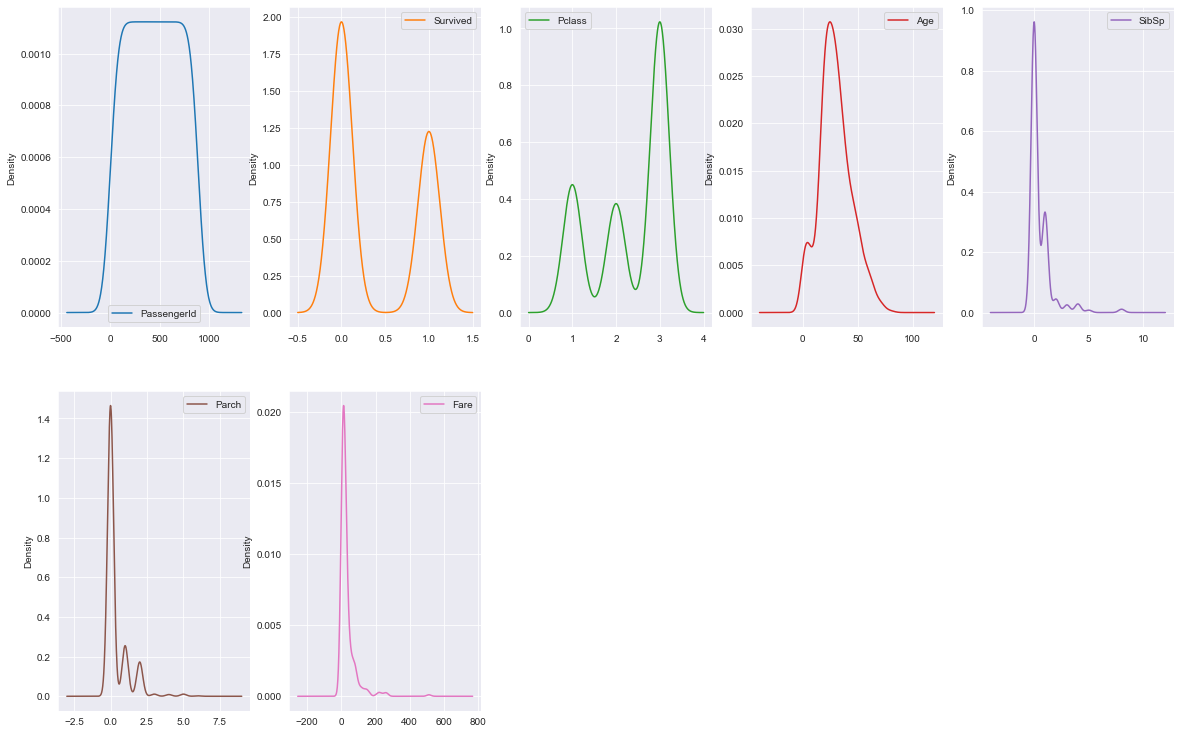

In [5]:
from matplotlib import pyplot


dF.plot(kind='density', subplots=True, layout=(3,5), sharex=False)
plt.gcf().set_size_inches(20,20)
pyplot.show()

### Exploratory Data Analysis (EDA)

##### Using Univariate Histogram Plots to inspect the Gaussian Properties (Normal Distribution) of the variables

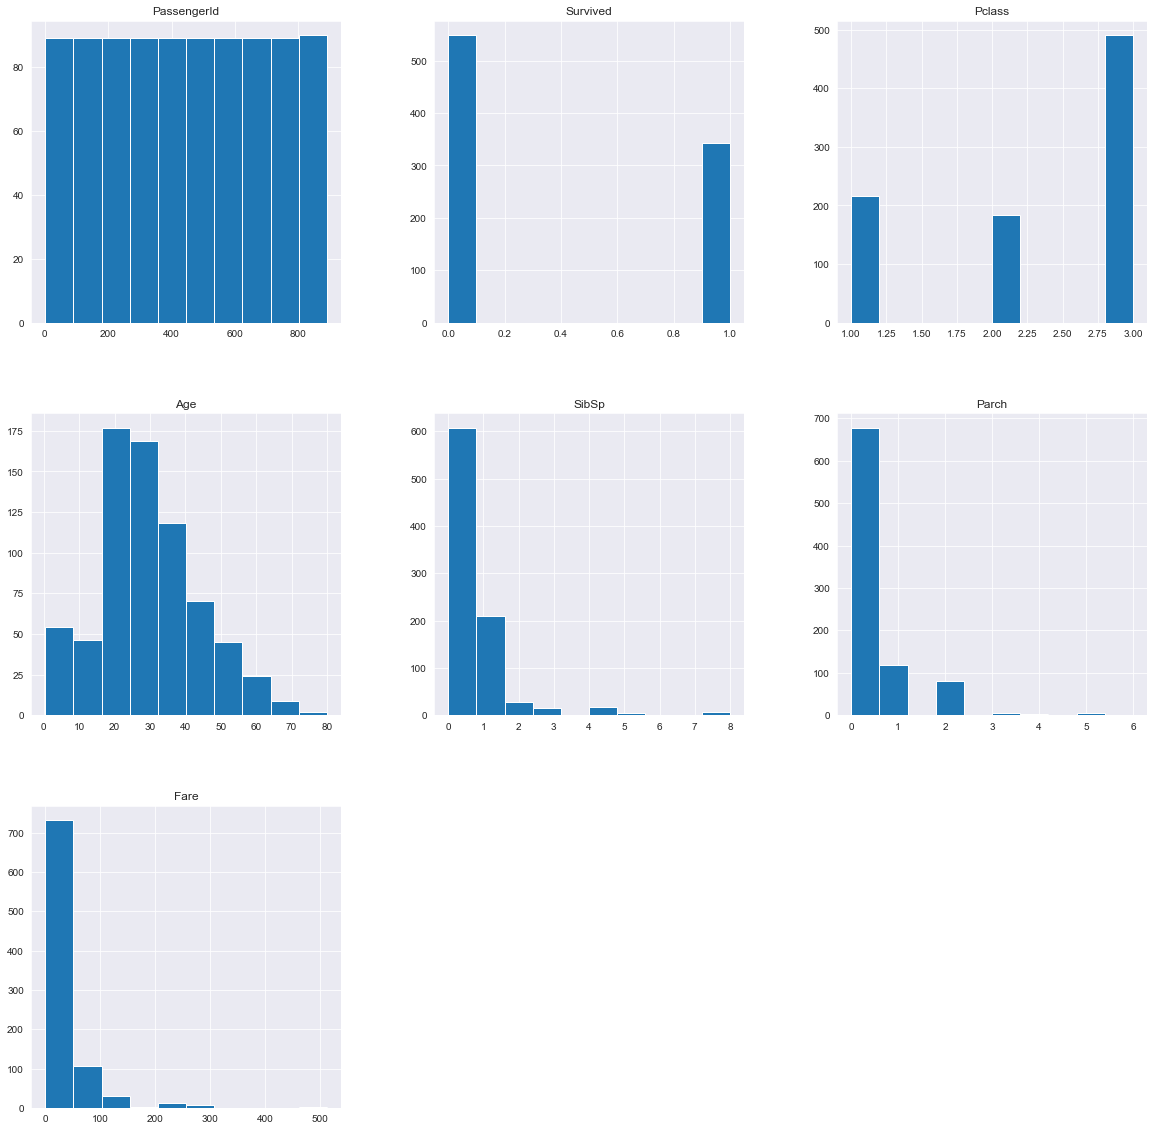

In [92]:
dF.hist()
plt.gcf().set_size_inches(20,20)
pyplot.show()

#### Inspecting the data for Outliers in distribution

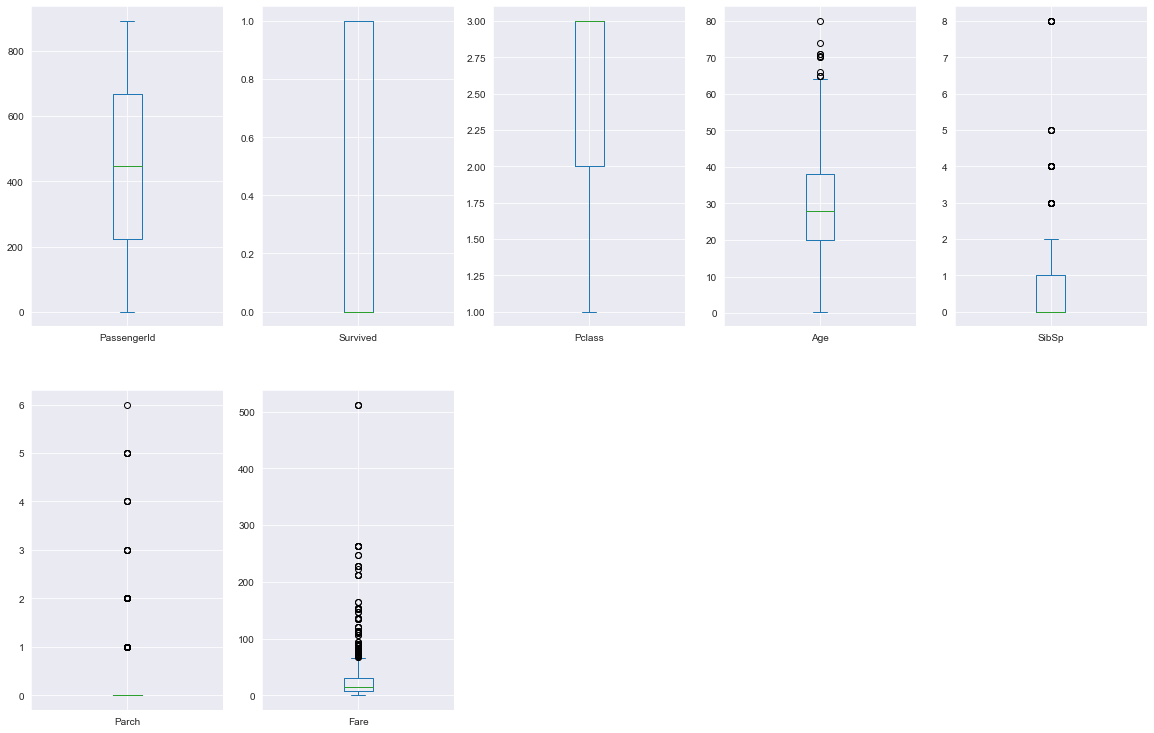

In [93]:
dF.plot(kind='box', subplots=True, layout=(3,5), sharex=False)
plt.gcf().set_size_inches(20,20)
pyplot.show()

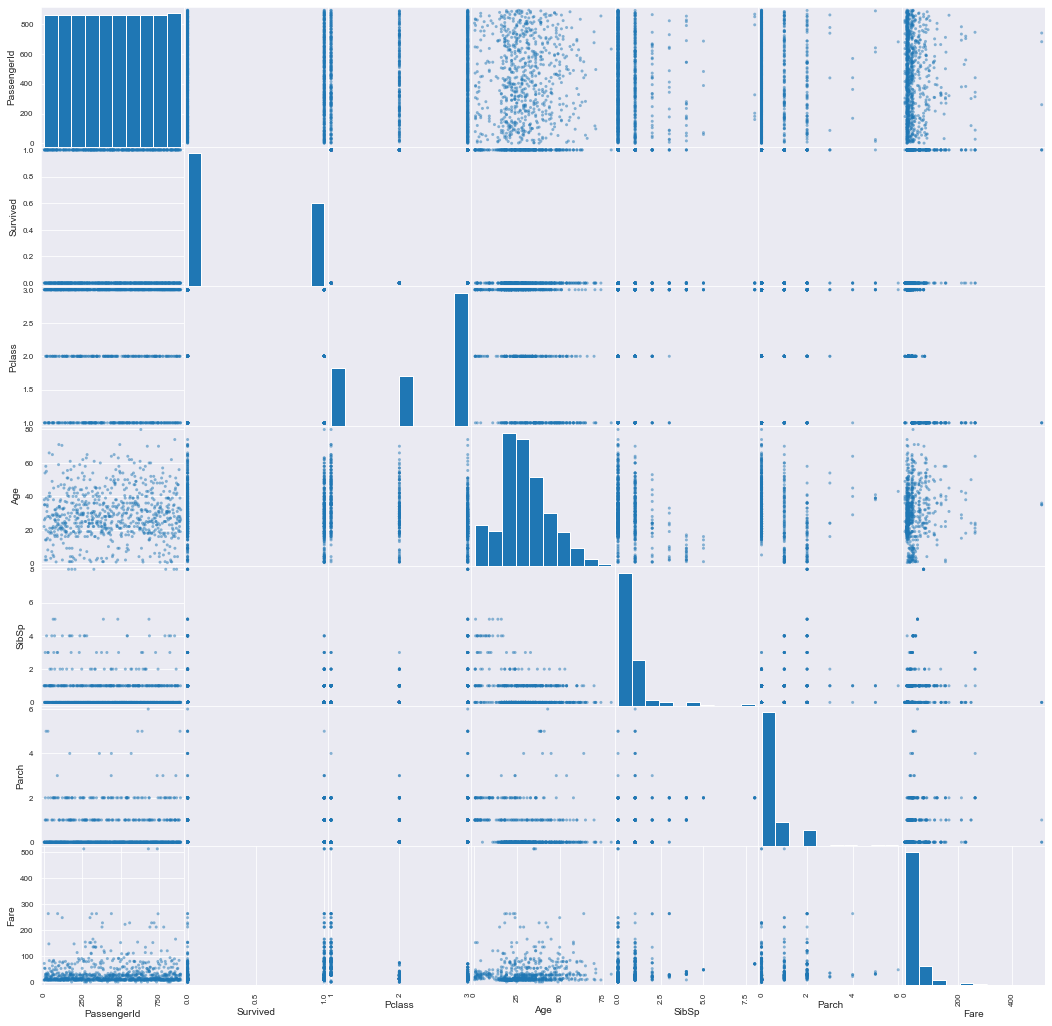

In [102]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix

scatter_matrix(dF)
pyplot.show()

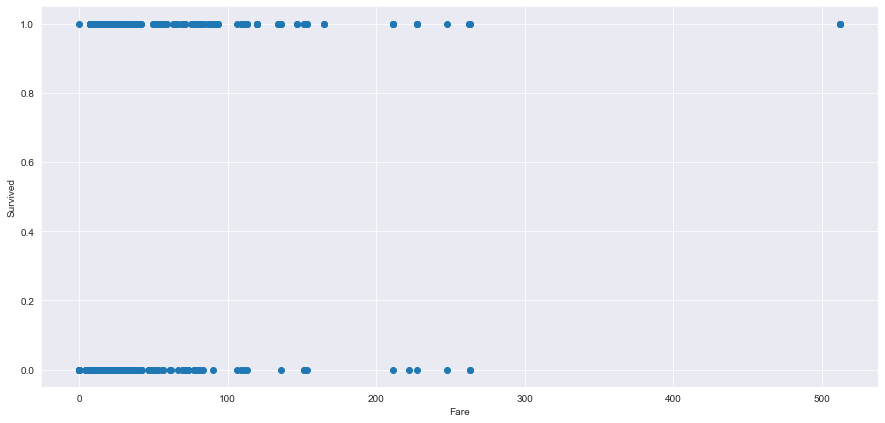

In [402]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dF['Fare'], dF['Survived'])
 
# x-axis label
ax.set_xlabel('Fare')
 
# y-axis label
ax.set_ylabel('Survived')
plt.show()

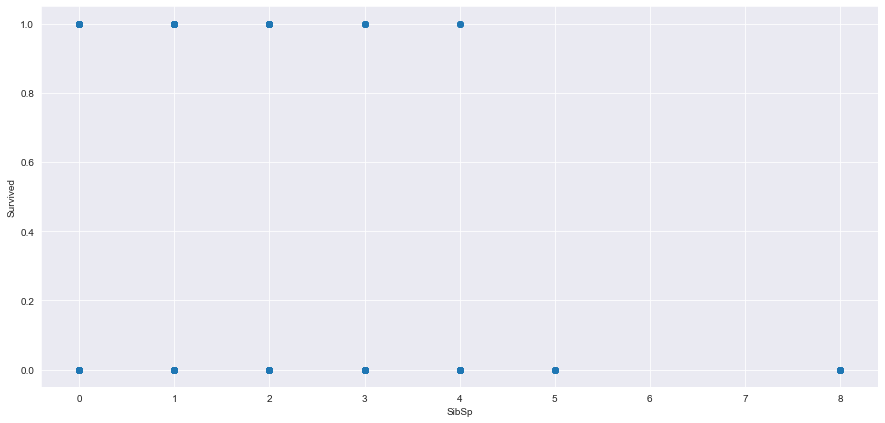

In [395]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dF['SibSp'], dF['Survived'])
 
# x-axis label
ax.set_xlabel('SibSp')
 
# y-axis label
ax.set_ylabel('Survived')
plt.show()

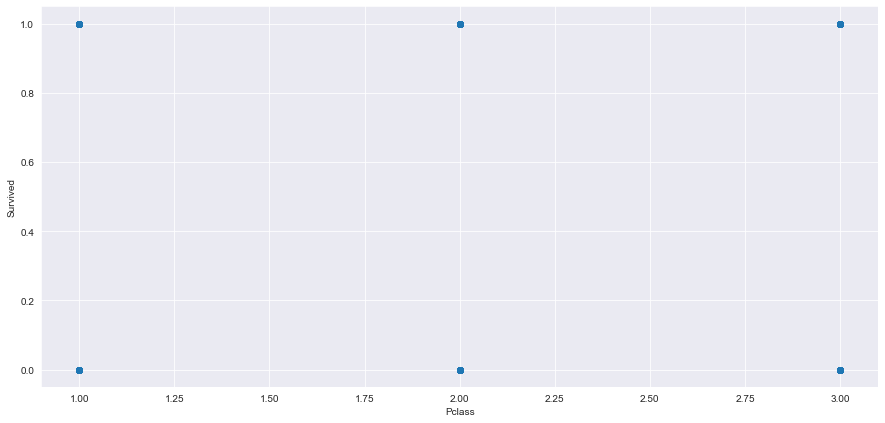

In [401]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dF['Pclass'], dF['Survived'])
 
# x-axis label
ax.set_xlabel('Pclass')
 
# y-axis label
ax.set_ylabel('Survived')
plt.show()

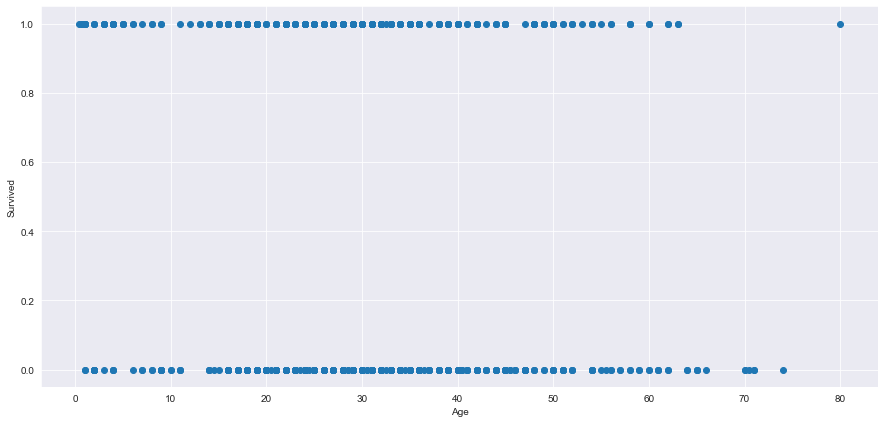

In [400]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dF['Age'],dF['Survived'])
 
# x-axis label
ax.set_xlabel('Age')
 
# y-axis label
ax.set_ylabel('Survived')
plt.show()

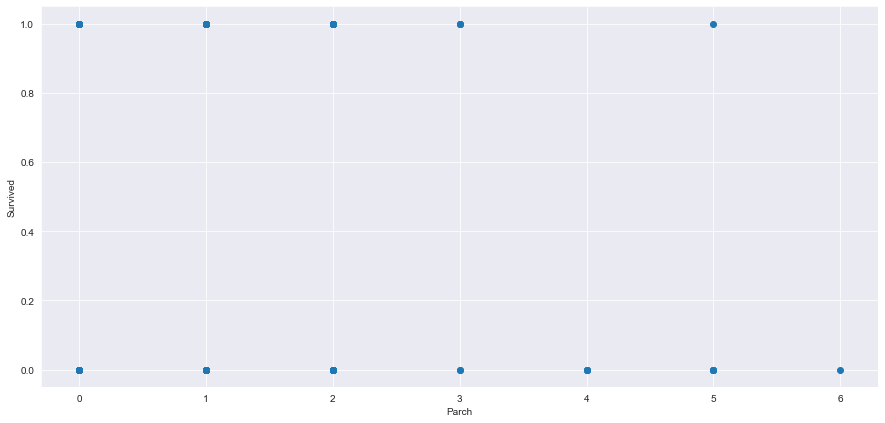

In [403]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dF['Parch'], dF['Survived'])
 
# x-axis label
ax.set_xlabel('Parch')
 
# y-axis label
ax.set_ylabel('Survived')
plt.show()

In [110]:
# Inference from inspection

# 1. The dataset consists of 891 instances (case) of and 12 features (attributes or variables) of the titanic problem domain 
# 2. The features; Age, Cabin and Embarked contains some missing values
# 3. The Age feature is in numeric floating point datatype and should be of type string
# 4. The survived feature is of type numeric int and should be in bool datatype
# 6. Cabin variable contains over 210 datapoints with NaN values
# 7. Embarked has two datapoints with NaN values
# 8. All variables except Age (due to floating point values) contains unique entries
# 9. Some passenegers have age below 1
# 10. PassengerID variable will be converted back to object datatype
# 11. Survived feature is nearly normally (Gaussian) distributed and is bi-modal
# 12. Pclass is an ordinal (categorical) feature converted to numeric variable, not normally distributed and is tri-modal
# 13. Age is nearly normally distributed
# 14. SibSp is not normally distributed and is skewed to the left
# 15. Parch is not normally distributed and is skewed to the left
# 16. Fare is not normally distributed and is skewed to the left
# 17. The Age variable contains some outlieing values close to the minimum value of the attribute
# 18. Parch is not normally distributed,its skewed to the left and its outliers dominated
# 19. Fare is not normally distributed, skewed to the left and contains lots of outlier values
# 20. There is a very wide scale between the attributes of the dataset
# 21. Age and Fare have standard deviation that is more than value 1 (Age deviation is 14 and Fare is 49.69)
# 

#### Data Cleaning and Pre-processing

In [26]:
# Making a copy of the dataframe
dF2 = dF.copy()
dF2.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
635,636,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,NaN,S
740,741,1,1,"Hawksford, Mr. Walter James",male,NaN,0,0,16988,30.0000,D45,S
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S


In [27]:
# Treating the datatypes (Feature Transformation)

# The age feature transformation
null_ages = dF2['Age'].isnull()
dF2['Age'] = dF2['Age'].astype(str).mask(null_ages, np.NaN)

# The Survived feature transformation
dF2.Survived = dF2.Survived.astype('bool')

# The PassengerID feature transformation
dF2.PassengerId = dF2['PassengerId'].astype(str)

#### Treating Missing values

In [28]:
# Treating missing values, since the data is not normally distributed, median value will be used to fill up missing datapoints

median_ages = dF2.groupby(['Sex', 'Pclass'])['Age'].median()
print(median_ages)
print(type(median_ages))

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64
<class 'pandas.core.series.Series'>


In [29]:
# Treating the missing values
# Since Age feature is nearly normally distributed, the NaN datapoints will be filled with the median values

def null_filler(data):
    if pd.isnull(data['Age']):
        return median_ages[data['Sex'], data['Pclass']]
    else:
        return data['Age']

    return median_value

dF2['Age'] = dF2.apply(null_filler, axis=1)
dF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    bool   
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 77.6+ KB


In [30]:
embarked_mode = dF2.groupby(['Embarked'])['Embarked'].value_counts().mode().max()
dF2['Embarked'].fillna(embarked_mode, inplace=True)
dF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    bool   
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 77.6+ KB


In [31]:
# Cabin attribute will be dropped from the dataset since they do impact the outcome of our analysis
dF2.drop(columns=['Cabin'], axis=1, inplace=True)
dF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    bool   
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 70.6+ KB


#### Treating Outliers: Optional, outliers introduces noise and skewness in distribution of the observation but can impact the outcome of our analysis if the variable to be treated has a strong relationship with the target variable or strong influence on the outcome of our analysis

In [32]:
# Treating the outliers in the Age variable
def age_series_type_converter(row):
    age_list = []
    for age in row['Age']:
        age = int(float(age))
        age_list.append(age)

    return age_list

dF2['Age'] = age_series_type_converter(dF2)

In [33]:
from scipy import stats
#dF2 = dF2[(np.abs(stats.zscore(dF2['Age'])) < 3)]

In [34]:

dF2 = dF2[(np.abs(stats.zscore(dF2['SibSp'])) < 3)]

In [246]:
#dF2 = dF2[(np.abs(stats.zscore(dF2['Fare'])) < 3)]

In [35]:
dF2.shape

(861, 11)

In [36]:
dF3 = dF2.copy()

In [ ]:
# 11. Survived feature is nearly normally (Gaussian) distributed and is bi-modal
# 12. Pclass is an ordinal (categorical) feature converted to numeric variable, not normally distributed and is tri-modal
# 13. Age is nearly normally distributed
# 14. SibSp is not normally distributed and is skewed to the left
# 15. Parch is not normally distributed and is skewed to the left
# 16. Fare is not normally distributed and is skewed to the left
# 18. Parch is not normally distributed,its skewed to the left and its outliers dominated
# 19. Fare is not normally distributed, skewed to the left and contains lots of outlier values
# 20. There is a very wide scale between the attributes of the dataset
# 21. Age and Fare have standard deviation that is more than value 1 (Age deviation is 14 and Fare is 49.69)

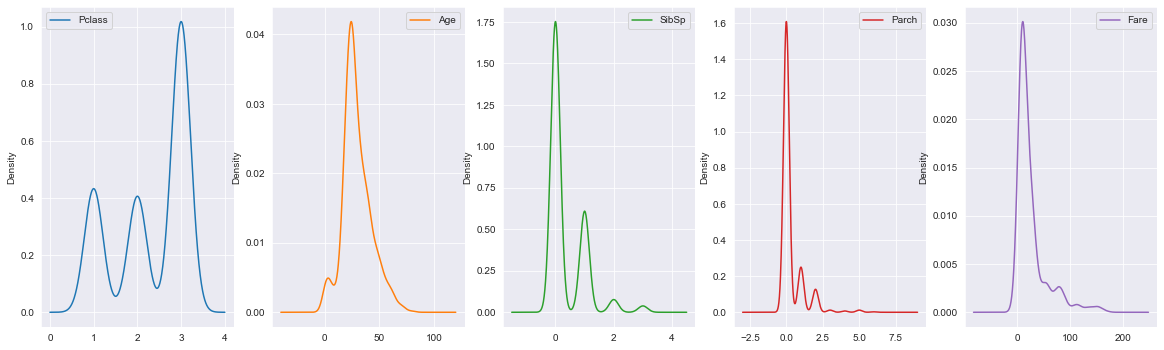

In [185]:
dF3.plot(kind='density', subplots=True, layout=(3,5), sharex=False)
plt.gcf().set_size_inches(20,20)
plt.show()

#### Normalizing, Re-scaling and Re-standardizing the variables:
##### For normalizing the data, three approaches can be used, (1) the maximum absolute scaling, (2) the min-max feature scaling (normalization) technique and the sklearn method. The later will be used to perform the operation

In [38]:
# Normalzing the attribute "Survived"
dFi = dF3.copy()

# COnverting the variable back to type bool
dFi.Survived = dF2.Survived.astype('bool')

In [139]:
dFi.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,False,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [39]:
# Normalzing the attribute "Parch"

# applying min-max scaling technique
column = 'Parch'

dFi[column] = (dFi[column] - dFi[column].min()) / (dFi[column].max() - dFi[column].min())


In [40]:
# Normalzing the attribute "SibSp"

# applying min-max scaling technique
column = 'SibSp'

dFi[column] = (dFi[column] - dFi[column].min()) / (dFi[column].max() - dFi[column].min())

##### Inspecting the summary statistics of the distribution to determine the outcome of the wrangling/Preprocessing step

In [41]:
dFi.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,861.0,2.284553,0.840324,1.0,1.0000,3.0,3.000000,3.0000
Age,861.0,29.689895,13.048220,0.0,21.0000,27.0,36.000000,80.0000
SibSp,861.0,0.121177,0.213018,0.0,0.0000,0.0,0.333333,1.0000
Parch,861.0,0.055943,0.129349,0.0,0.0000,0.0,0.000000,1.0000
Fare,861.0,31.822531,50.415908,0.0,7.8958,13.5,29.700000,512.3292


In [42]:
dFi.shape

(861, 11)

In [43]:
dFi.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
562,563,False,2,"Norman, Mr. Robert Douglas",male,28,0.000000,0.000000,218629,13.5000,S
431,432,True,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,21,0.333333,0.000000,376564,16.1000,S
564,565,False,3,"Meanwell, Miss. (Marion Ogden)",female,21,0.000000,0.000000,SOTON/O.Q. 392087,8.0500,S
381,382,True,3,"Nakid, Miss. Maria (""Mary"")",female,1,0.000000,0.333333,2653,15.7417,C
707,708,True,1,"Calderhead, Mr. Edward Pennington",male,42,0.000000,0.000000,PC 17476,26.2875,S


### Data Analysis and Visualizations

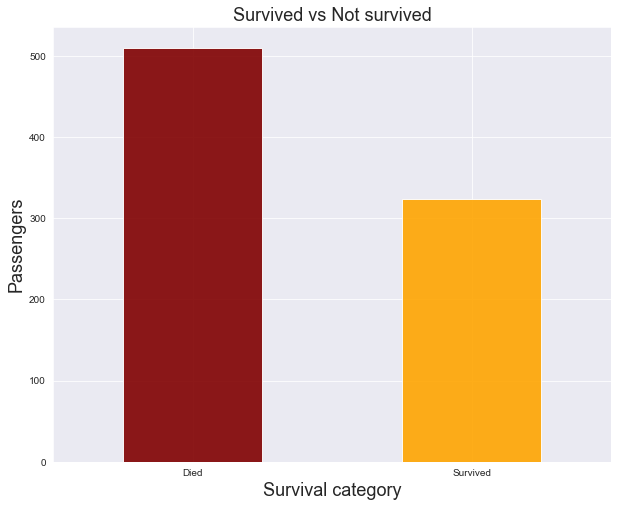

In [34]:
survivecounts = dFi.groupby(['Survived'])['Survived'].count()
survivecounts.plot(kind='bar', color=['maroon', 'orange'], alpha=0.9, figsize=(10,8), rot=0)
plt.title("Survived vs Not survived", fontsize=18)
plt.xlabel('Survival category', fontsize=18)
plt.ylabel('Passengers', fontsize=18)
#plt.legend(['Died', 'Survived'])
plt.xticks([0, 1], ['Died', 'Survived']);

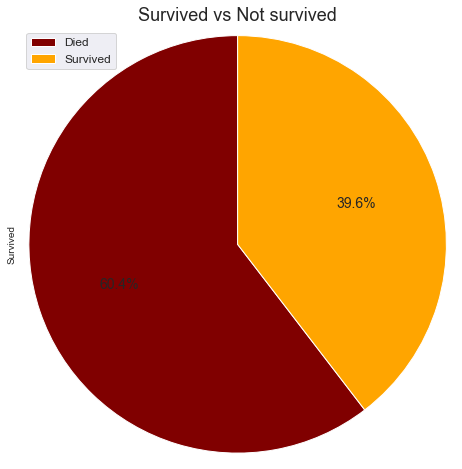

In [356]:
# Alternatively
survivecounts = dFi.groupby(['Survived'])['Survived'].count()
survivecounts.plot(kind='pie', colors=['maroon', 'orange'], labels=None, textprops={'fontsize': 14}, center=(0,0), radius=1.2, autopct='%1.1f%%', figsize=(8,8), startangle=90)
plt.title("Survived vs Not survived", fontsize=18)
plt.legend(['Died', 'Survived'], fontsize=12, loc='upper left');

- What factors made people more likely to survive?

In [36]:
# Hugging the data

Survived = dFi[dFi['Survived'] == True]
Not_survived = dFi[dFi['Survived'] == False]


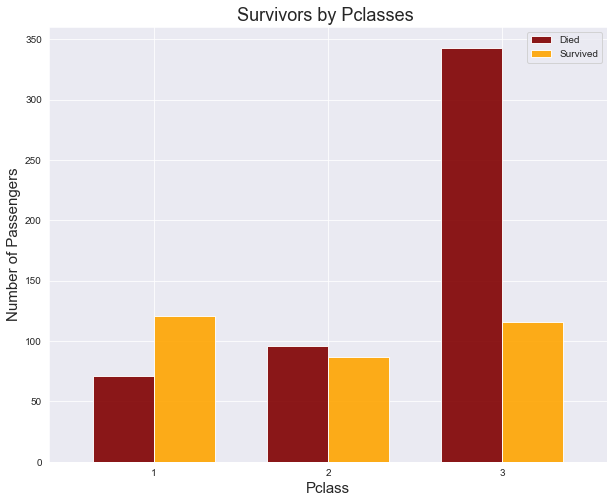

In [37]:
PclassdFi = dFi.groupby(['Pclass', 'Survived'])['Pclass'].count()
PclassdFi.unstack().plot(kind='bar', color=['maroon', 'orange'], width=0.7, alpha=0.9, figsize=(10,8), rot=0)
plt.title("Survivors by Pclasses ", fontsize=18)
plt.xlabel('Pclass', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.legend(['Died', 'Survived'])
plt.xticks(rotation=0)
plt.show();

### Alternatively

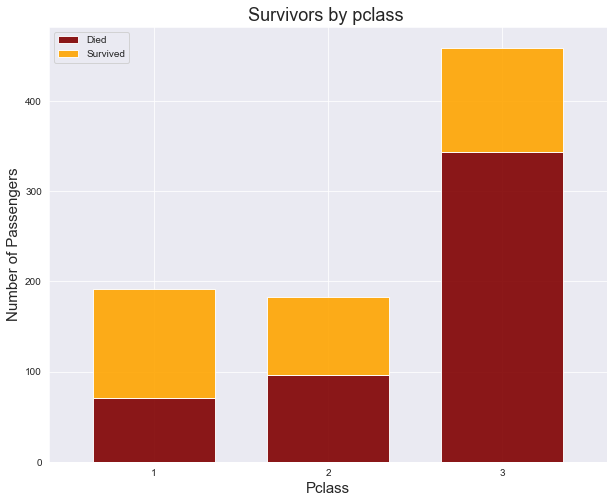

In [38]:
PclassdFi.unstack().plot(kind='bar', stacked=True, legend=True, ylabel='Number of Passengers', xlabel='Pclass', color=['maroon', 'orange'], width=0.7, alpha=0.9, figsize=(10,8), rot=0)
plt.title("Survivors by pclass ", fontsize=18)
plt.xlabel('Pclass', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.legend(['Died', 'Survived'])
plt.xticks(rotation=0)
plt.show()

- Proportion of passengers who survived per total number in a passenger class

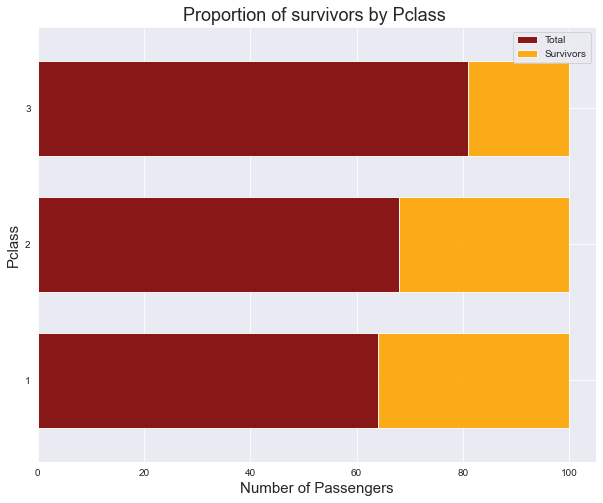

In [39]:
surviveddF = dFi[['Survived', 'Pclass']]


# Total number of passengers in each class
pclass_total = surviveddF.groupby(['Pclass'])['Pclass'].count()

# Getting the proportion of passengers who survived out of the total passengers in each class
pclass_survived_total = surviveddF.query('Survived == True').groupby(['Pclass'])['Pclass'].count()

#pclass_survived_df = pd.merge(pclass_survived_total, pclass_total
pclass_df = pd.concat([pclass_survived_total, pclass_total], axis=1)

# Renaming the columns
pclass_df.columns = ['Survived', 'Total']
# Re-arranging the columns
pclass_df = pclass_df[['Total', 'Survived']]

# Manipulating the dataframe to obtain a 100% stacked bar chart
pclass_df1 = pclass_df.div(pclass_df.sum(axis=1), axis=0)*100

# Obtaining the plot
pclass_df1.plot(kind='barh', stacked=True, legend=True, color=['maroon', 'orange'], width=0.7, alpha=0.9, figsize=(10,8), rot=0)
plt.title("Proportion of survivors by Pclass ", fontsize=18)
plt.xlabel('Number of Passengers', fontsize=15)
plt.ylabel('Pclass', fontsize=15)
plt.legend(['Total', 'Survivors'])
plt.xticks(rotation=0)
plt.show()

- Why did first class passengers record the highest suvivors on average?, could it be because they paid more? or because they are older?

In [45]:
# Visualizing fares paid by passengers in different passenger classes 
surviveddF = dFi[['Fare', 'Pclass']]
pclass_fares = surviveddF.groupby(['Fare', 'Pclass'])['Pclass'].sum()
pclass_fares
pclass_fares = pd.DataFrame(pclass_fares)
pclass_fares.columns = ['size']
pclass_fares.reset_index(inplace=True)
pclass_fares

,Fare,Pclass,size
0,0.0000,1,5
1,0.0000,2,12
2,0.0000,3,12
3,4.0125,3,3
4,5.0000,1,1
...,...,...,...
249,227.5250,1,4
250,247.5208,1,2
251,262.3750,1,2
252,263.0000,1,4


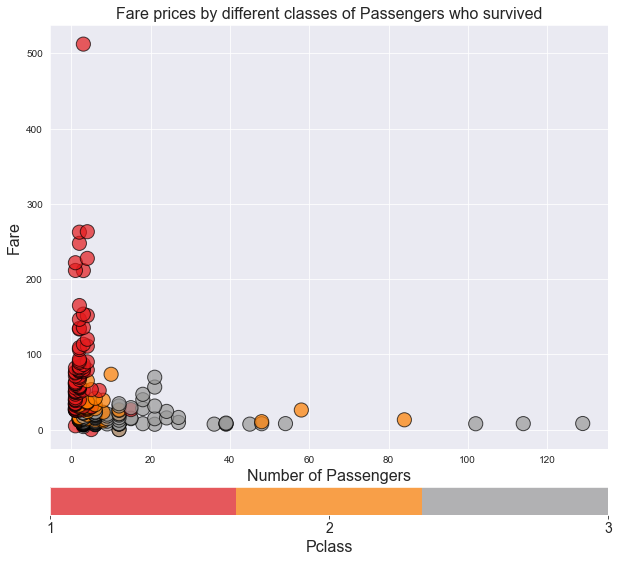

In [93]:
fig = plt.figure(figsize=(10, 10))
x = pclass_fares['size']
y = pclass_fares['Fare']
colors = pclass_fares['Pclass']

plt.scatter(x, y, alpha=.7, edgecolor='k', s=200, c=colors, cmap=plt.cm.get_cmap("Set1", 3))
plt.title("Fare prices by different classes of Passengers who survived", fontsize=16)
plt.xlabel('Number of Passengers', fontsize=16)
cbar = plt.colorbar(orientation="horizontal", pad=0.07)
cbar.set_label(label="Pclass", fontsize=16)
cbar.set_ticks([1,2,3])
cbar.ax.tick_params(labelsize=14)
plt.ylabel('Fare', fontsize=16)
plt.xticks(rotation=0)
plt.clim(1,3)
plt.show()

#### From the plot above, it can be seen that the First and Third class passengers survived more than the second class passengers.

#### Alternatively

In [46]:
# Defning a function to hold a new column of passenger age groups
def fare_grouper(row):
    if row['Fare'] < 100:
        return '0 - 100'
    elif row['Fare'] < 200:
        return '100 - 200'
    elif row['Fare'] < 300:
        return '200 - 300'
    elif row['Fare'] < 400:
        return '300 - 400'
    elif row['Fare'] < 500:
        return '400 - 500'
    else:
        return 'Above 500'

pclass_fares['Fare_class'] = pclass_fares.apply(fare_grouper, axis=1)
pclass_fares

,Fare,Pclass,size,Fare_class
0,0.0000,1,5,0 - 100
1,0.0000,2,12,0 - 100
2,0.0000,3,12,0 - 100
3,4.0125,3,3,0 - 100
4,5.0000,1,1,0 - 100
...,...,...,...,...
249,227.5250,1,4,200 - 300
250,247.5208,1,2,200 - 300
251,262.3750,1,2,200 - 300
252,263.0000,1,4,200 - 300


In [47]:
pclass_group = pclass_fares.groupby(['Fare_class', 'Pclass'])['size'].count()
pclass_group

Fare_class  Pclass
0 - 100     1          74
            2          42
            3         118
100 - 200   1          12
200 - 300   1           7
Above 500   1           1
Name: size, dtype: int64

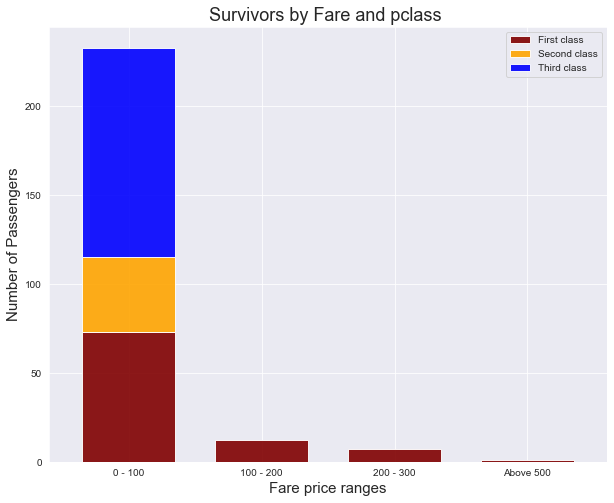

In [280]:
pclass_fares = pclass_fares.groupby(['Fare_class', 'Pclass'])['size'].count()


pclass_fares.unstack().plot(kind='bar', stacked=True, legend=True, ylabel='Number of Passengers', xlabel='Fare_class', color=['maroon', 'orange', 'blue'], width=0.7, alpha=0.9, figsize=(10,8), rot=0)
plt.title("Survivors by Fare and pclass ", fontsize=18)
plt.xlabel('Fare price ranges', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.legend(['First class', 'Second class', 'Third class'])
plt.xticks(rotation=0)
plt.show()


- From the above plot, it can be inferred that first class passengers bought the high priced ticket which is more money than any other class of passengers on board the ship

##### Was the Age of the passengers a determining factor of whether they survived or not? Which age group had better chance of survival ?

In [48]:
# Defning a function to hold a new column of passenger age groups
def age_grouper(row):
    if row['Age'] < 10:
        return 'Under 10'
    elif row['Age'] < 20:
        return '10 - 20'
    elif row['Age'] < 30:
        return '20 - 30'
    elif row['Age'] < 40:
        return '30 - 40'
    elif row['Age'] < 50:
        return '40 - 50'
    elif row['Age'] < 60:
        return '50 - 60'
    elif row['Age'] < 70:
        return '60 - 70'
    else:
        return 'Above 70'
    return 'Above 70'

dFi['Agegroup'] = dFi.apply(age_grouper, axis=1)


In [49]:
# Hugging the dataset
survived = dFi.loc[dFi['Survived'] == True]
died = dFi.loc[dFi['Survived'] == False]

# Grouping the dataframe by agegroups and returning the size of each groups for survived subset
survivedAgeGroup = survived.groupby(['Agegroup'])['Agegroup'].count()

# Grouping the dataframe by agegroups and returning the size of each groups for died subset
diedAgeGroup = died.groupby(['Agegroup'])['Agegroup'].count()

# merging the two pandas series together into a dataframe
Agegrouping = pd.concat([survivedAgeGroup, diedAgeGroup], axis=1)
Agegrouping.columns = ['survived', 'died']
lst = ['Under 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', 'Above 70']
Agegrouping = Agegrouping.loc[lst]

#Re-arranging the columns
Agegrouping = Agegrouping[['died', 'survived']]
print(Agegrouping)

          died  survived
Agegroup                
Under 10    10        36
10 - 20     55        40
20 - 30    238       113
30 - 40    101        84
40 - 50     71        39
50 - 60     28        20
60 - 70     13         6
Above 70     6         1


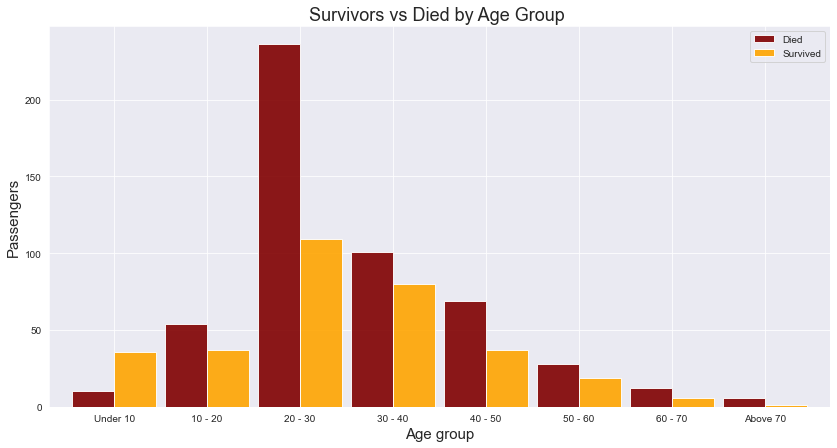

In [192]:
Agegrouping.plot(kind='bar', stacked=False, legend=True, color=['maroon', 'orange'], width=0.9, alpha=0.9, figsize=(14,7), rot=0)
plt.title("Survivors vs Died by Age Group ", fontsize=18)
plt.xlabel('Age group', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.legend(['Died','Survived'])
plt.xticks(rotation=0)
plt.show();

- Children under 10 years had better chance of survival. The young people between the ages of 20 - 30 recorded the least survival rate compared to other age group. The elderly passengers whose age are above 70, though contributes a small fraction of the population still recorded less sruvival number 

- Could Age be the reason why 1st class passengers recorded the highest survival?

In [50]:
# Selecting the instances where the passengers survived and assigning that to a new dataframe
survived = dFi.loc[dFi['Survived'] == True]
firstclassAgedF = survived.groupby(['Agegroup', 'Pclass'])['Pclass'].count()
firstclassAgedF

Agegroup  Pclass
10 - 20   1         15
          2          9
          3         16
20 - 30   1         24
          2         24
          3         65
30 - 40   1         48
          2         21
          3         15
40 - 50   1         27
          2         10
          3          2
50 - 60   1         15
          2          5
60 - 70   1          4
          2          1
          3          1
Above 70  1          1
Under 10  1          2
          2         17
          3         17
Name: Pclass, dtype: int64

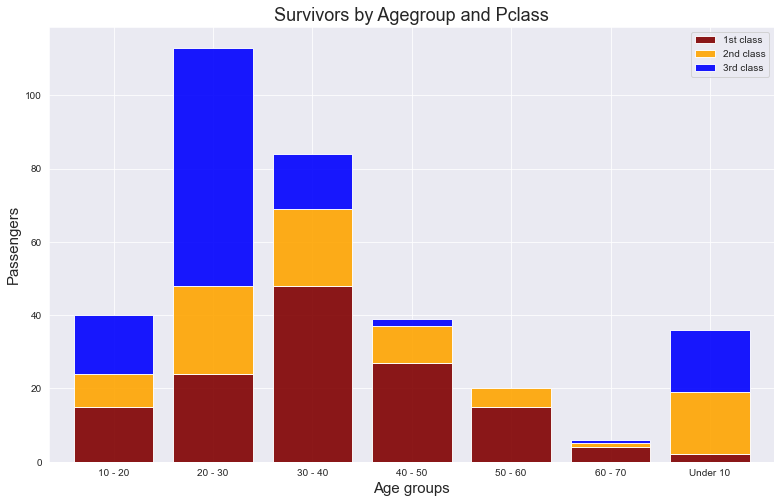

In [285]:
firstclassAgedF.unstack().plot(kind='bar', stacked=True, color=['maroon', 'orange', 'blue'], width=0.8, alpha=0.9, figsize=(13,8), rot=0)
plt.title("Survivors by Agegroup and Pclass", fontsize=18)
plt.xlabel('Age groups', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.legend(['1st class', '2nd class', '3rd class'])
plt.xticks(rotation=0)
plt.show();

### What Gender had more survival and what Gender had more death record?

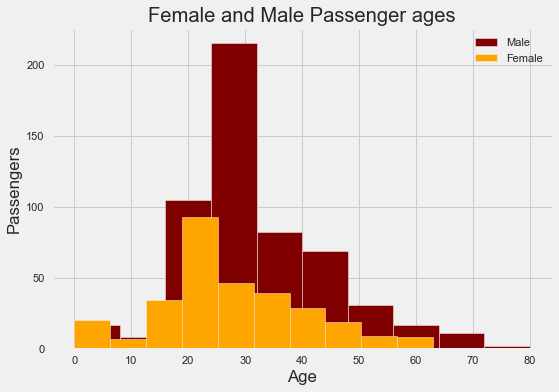

In [129]:
# First reviewing the age distribution
# Distribution of the ages for male and female passengers on board the titanic ship
male = dFi.loc[dFi['Sex'] == 'male']['Age']
female = dFi.loc[dFi['Sex'] == 'female']['Age']

male.hist(label='Male', color='maroon')
female.hist(label='Female', color='orange')

plt.xlabel('Age')
plt.ylabel('Passengers')
plt.title('Female and Male Passenger ages')
plt.legend(loc='best')


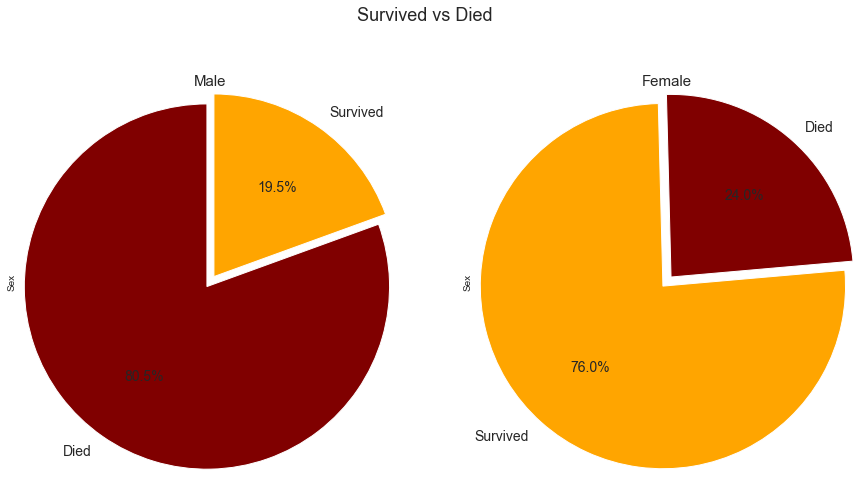

In [352]:
male = dFi.loc[dFi['Sex'] == 'male']
female = dFi.loc[dFi['Sex'] == 'female']

malesurviveProp = male.groupby(['Survived']).count()['Sex']
femalesurviveProp = female.groupby(['Survived']).count()['Sex']


fig, axs = plt.subplots(1,2, figsize=(15,8))

malesurviveProp.plot(kind='pie', ax=axs[0], colors=['maroon', 'orange'], labels=['Died', 'Survived'], center=(0,0), textprops={'fontsize': 14}, radius=1.2, autopct='%1.1f%%', explode=(0.04,0.04), startangle=90)
plt.sca(axs[0])
plt.title('Male', fontsize=15)
femalesurviveProp.plot(kind='pie', ax=axs[1], colors=['maroon', 'orange'], labels=['Died', 'Survived'], center=(0,0), textprops={'fontsize': 14}, radius=1.2, autopct='%1.1f%%', explode=(0.04,0.04), startangle=365)
plt.sca(axs[1])
plt.title('Female', fontsize=15)
plt.suptitle("Survived vs Died", fontsize=18);

Text(0.5, 1.0, 'Gender Survival by Class')

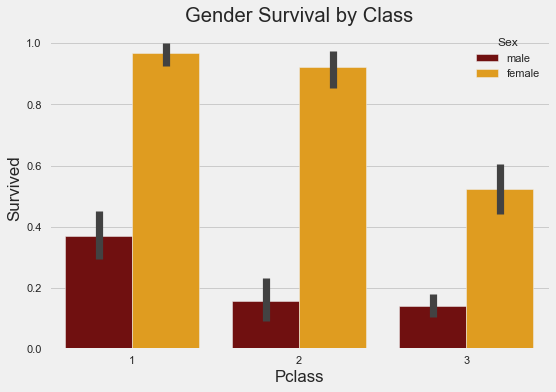

In [135]:
# Gender survival by Pclass
import seaborn as sns
cols=['maroon' if u == 'male' else 'orange' for u in dFi.Sex]
sns.barplot(x='Pclass', y='Survived', data=dFi, palette=cols, hue='Sex').set_title('Gender Survival by Class')

### What was male and female survival per class and age?

In [65]:
male = dFi.loc[(dFi['Sex'] == 'male') & (dFi['Survived'] == True)]
female = dFi.loc[(dFi['Sex'] == 'female') & (dFi['Survived'] == True)]

malesurvival = male.groupby(['Agegroup', 'Pclass'])['Pclass'].count()
femalesurvival = female.groupby(['Agegroup', 'Pclass'])['Pclass'].count()


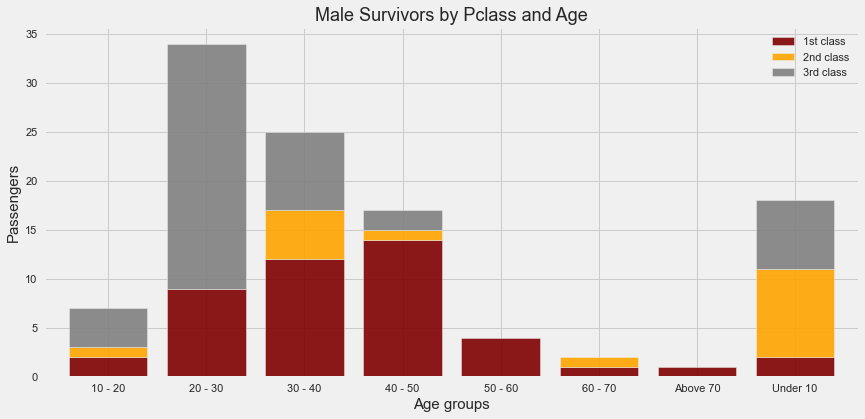

In [75]:
malesurvival.unstack().plot(kind='bar', stacked=True, color=['maroon', 'orange', 'gray'], width=0.8, alpha=0.9, figsize=(13,6), rot=0)
plt.title("Male Survivors by Pclass and Age", fontsize=18)
plt.xlabel('Age groups', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.legend(['1st class', '2nd class', '3rd class'])
plt.xticks(rotation=0)
plt.show();

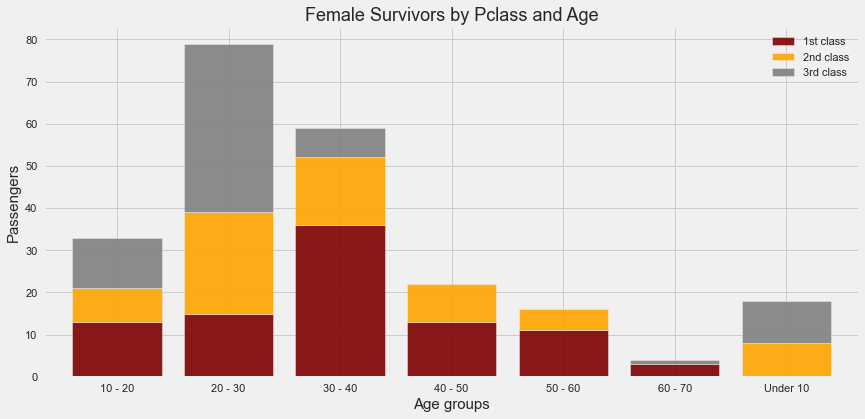

In [76]:
femalesurvival.unstack().plot(kind='bar', stacked=True, color=['maroon', 'orange', 'gray'], width=0.8, alpha=0.9, figsize=(13,6), rot=0)
plt.title("Female Survivors by Pclass and Age", fontsize=18)
plt.xlabel('Age groups', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.legend(['1st class', '2nd class', '3rd class'])
plt.xticks(rotation=0)
plt.show();




Text(0.5, 1.0, 'Male and Female Passengers Ages by Class')

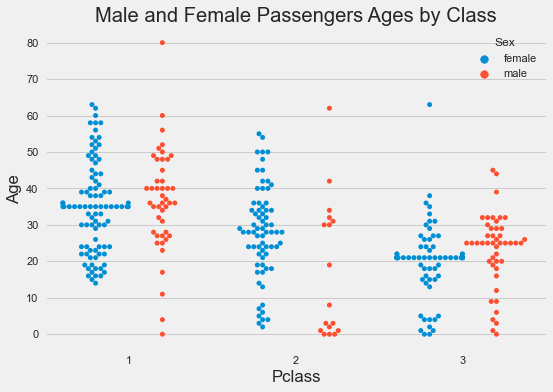

In [77]:
survival = dFi.loc[(dFi['Survived'] == True)]
import seaborn as sns

sns.swarmplot(x='Pclass', y='Age', data=survival, hue='Sex', dodge=True).set_title('Male and Female Passengers Ages by Class')

#### Findings & Conclusion:
- 1. More than 50% of the passengers on board the wrecked ship died.
- 2. About 80% of passengers with a 3rd class ticket died in the wreck. Only 20% percent of 3rd class persons survived the crash
- 3. 1st class passengers recorded the highest survival.
- 4. Death record is coming from the population of young people between the ages of 20-30, While children under the age of 10 survived more in comparison to those that died.
- 5. Passengers who paid 0 to 100 pounds records the highest survival with 3rd class passengers top of the chart in that group
- 6. About 76.0% of females survived and 19.5% males survived. More females survived than males.
- 7. For females, the young people between the ages of 20 to 30 has the highest number of survival while the older people recorded the least number of survival
- 8. For gender survival by class, females survived more than males across all passenger classes

### Limitations:
- 1. Conclusions here are based on visualizations and proportion calculations. There is room for further analysis to be made with statistical inferences.
- 2. The observation here is only a representation of the population.
- 3. Outliers which could lead to skewness and distortion of gaussian properties of some variable were treated and the result herein might be slightly differ from other similar analysis of this dataset.
- 4. The result presented is tentative

#### References:
- https://notebook.community/vikramsjn/Investigate-Titanic-Dataset/Analysis%20of%20Titanic%20Dataset

- http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf

- https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

https://www.realcode4you.com/post/titanic-survival-prediction-practice-set-questions